In [1]:
%pylab inline
import scipy.integrate

Populating the interactive namespace from numpy and matplotlib


# Solve by Python
very simple and easy

First I define the differential equation as a function called logistic() and the analytical solution function called solution()

In [12]:
# define the model
def logistic(x, t):
    return x * (1 - x)

# analytical solution
def solution(t, x0):
    return x0 * np.e**t / (1 - x0 + x0 * np.e**t)

Now we could solve the equation using the function scipy.integrate.odeint.

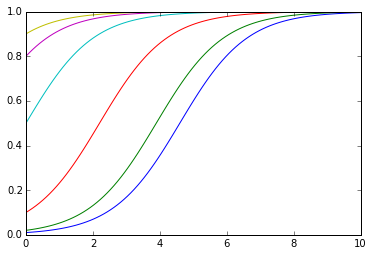

In [16]:
# set parameters
x0 = np.array([0.01, 0.02, 0.1, 0.5, 0.8, 0.9]) # different initial point
t = linspace(0, 10, 100)

# solve the numerical solution
x = scipy.integrate.odeint(logistic, x0, t)
plot(t, x)

Compare the numerical solution and analytical solution

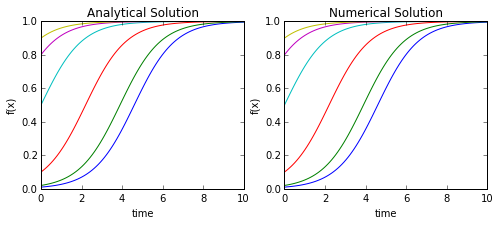

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax = ax.ravel()

# plot analytical solution
for x_0 in x0:
    ax[0].plot(t, solution(t, x_0))

# solve and plot numerical solution
x = scipy.integrate.odeint(logistic, x0, t)
ax[1].plot(t, x)

# set label and titel
ax[0].set_title("Analytical Solution")
ax[0].set_xlabel('time')
ax[0].set_ylabel('f(x)')

ax[1].set_title("Numerical Solution")
ax[1].set_xlabel('time')
ax[1].set_ylabel('f(x)')

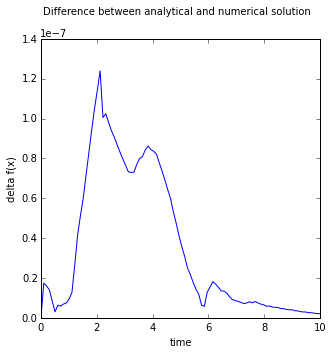

In [14]:
# difference between analytical and numerical solution
x_0 = 0.1
x_num = scipy.integrate.odeint(logistic, x_0, t)
x_ana = solution(t, x_0)
# print(x_num[:,0])
# print(x_ana)
#"""
# plot the difference
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(t, np.abs(x_ana - x_num[:, 0]))
fig.text(0.5, 0.99, "Difference between analytical and numerical solution", horizontalalignment = 'center', verticalalignment = 'top')
ax.set_xlabel("time")
ax.set_ylabel("delta f(x)")
#"""

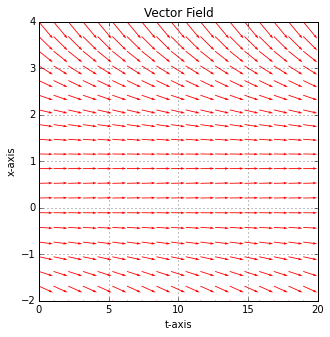

In [6]:
# Vector Field
def field():
    # set parameters
    x = linspace(-2, 4, 20)
    t = linspace(0, 20, 20)
    x, t = meshgrid(x, t)

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    dx = logistic(x, t)
    dt = 10
    ax.quiver(t, x, dt, dx, scale = 200, color = "r")

    # axis
    ax.grid(True)

    # labels
    ax.set_xlabel('t-axis')
    ax.set_ylabel('x-axis')
    ax.set_title('Vector Field')
    # title
    #fig.text(0.5, 0.99, 'Vector Field', horizontalalignment = 'center', verticalalignment = 'top')

field()

# Solve by myself (still unsuccessful)

In [43]:
# logistic model
def logistic(x):
    return x * (1 - x)

# attempt to solve using Runge-Kutta method
def RK4(x0 = 0, t0 = 0, t1 = 5 , dt = 0.01, f = None):  
    tsp = np.arange(t0, t1, dt)
    Nsize = np.size(tsp)
    #X = np.empty((Nsize, np.size(x0)))
    X = [0 for dummyNum in range(Nsize)]
    X[0] = x0

    for i in range(1, Nsize):
        k1 = f(X[i-1]) * dt
        k2 = f(X[i-1] + 1/2 * k1) * dt
        k3 = f(X[i-1] + 1/2 * k2) * dt
        k4 = f(X[i-1] + k3) * dt
        X[i] = X[i-1] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
        
    return X

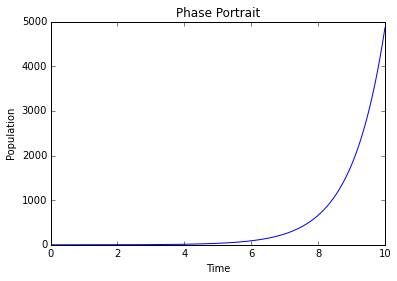

In [54]:
def do_pplot():
    pylab.figure()
    t0 = 0
    t1 = 10
    dt = 0.01
    x0 = 0.1
    tsp = np.arange(t0, t1, dt)
    X = RK4(x0 = x0, t0 = t0, t1 = t1, dt = dt, f = logistic)
    pylab.plot(tsp, X)
    pylab.title("Phase Portrait")
    pylab.xlabel("Time")
    pylab.ylabel("Population")
    pylab.show()
    return

do_pplot()